<a href="https://colab.research.google.com/github/keduog/LLM/blob/main/Spirograph1234.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

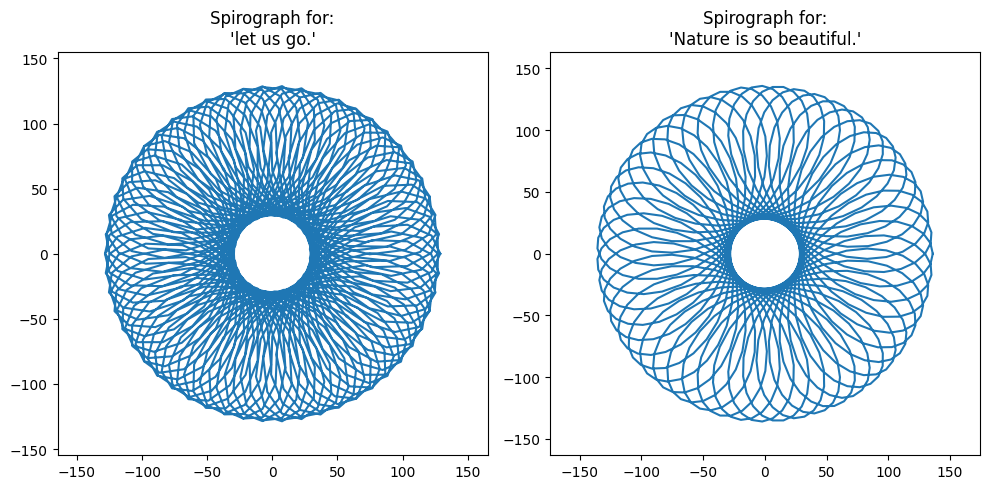

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define spirograph function
def spirograph(R, r, d, num_points=1000):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)  # Corrected here
    return x, y

# Map sentence embedding to spirograph parameters
def embedding_to_params(embedding):
    normed = np.tanh(embedding[:3])  # compress range to [-1, 1]
    R = 100 + int(50 * normed[0])    # R: large radius
    r = 20 + int(10 * normed[1])     # r: small radius
    d = 50 + int(40 * normed[2])     # d: pen offset
    return R, r, d

# Input sentences
sentence1 = "let us go."
sentence2 = "Nature is so beautiful."

# Generate embeddings
emb1 = model.encode(sentence1)
emb2 = model.encode(sentence2)

# Convert to spirograph parameters
R1, r1, d1 = embedding_to_params(emb1)
R2, r2, d2 = embedding_to_params(emb2)

# Plot both spirographs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
x1, y1 = spirograph(R1, r1, d1)
plt.plot(x1, y1)
plt.title(f"Spirograph for:\n'{sentence1}'")
plt.axis('equal')

plt.subplot(1, 2, 2)
x2, y2 = spirograph(R2, r2, d2)
plt.plot(x2, y2)
plt.title(f"Spirograph for:\n'{sentence2}'")
plt.axis('equal')

plt.tight_layout()
plt.show()

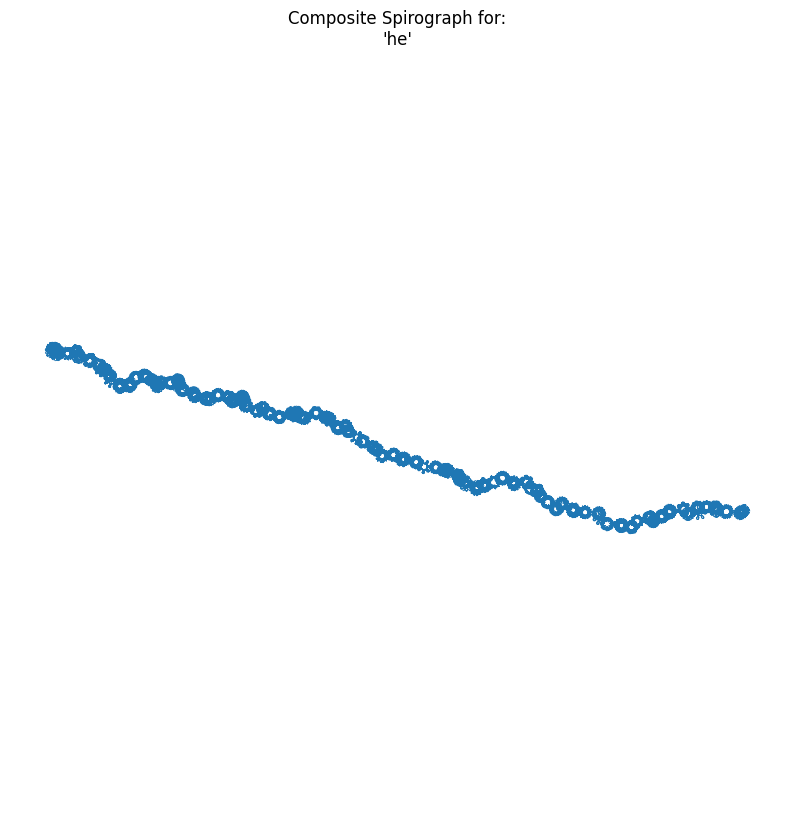

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load a sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to generate a spirograph from parameters
def spirograph(R, r, d, num_points=100):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)
    return x, y

# Function to normalize embeddings to spirograph parameter ranges
def normalize_triplet(triplet):
    eR, er, ed = np.tanh(triplet)  # compress to [-1, 1]
    R = 100 + 50 * eR   # Range: [50, 150]
    r = 15 + 10 * er    # Range: [5, 25]
    d = 40 + 30 * ed    # Range: [10, 70]
    return R, r, d

# Composite spirograph from full embedding
def composite_spirograph(embedding):
    x_total, y_total = [], []
    triplets = embedding[:384].reshape(-1, 3)
    for i, triplet in enumerate(triplets):
        R, r, d = normalize_triplet(triplet)
        x, y = spirograph(R, r, d, num_points=150)
        # Offset for continuity
        if x_total:
            x += x_total[-1] - x[0]
            y += y_total[-1] - y[0]
        x_total.extend(x)
        y_total.extend(y)
    return np.array(x_total), np.array(y_total)

# Input sentences
sentence = "he"
embedding = model.encode(sentence)

# Generate and plot
x, y = composite_spirograph(embedding)
plt.figure(figsize=(10, 10))
plt.plot(x, y, linewidth=0.6)
plt.title(f"Composite Spirograph for:\n'{sentence}'")
plt.axis('equal')
plt.axis('off')
plt.show()

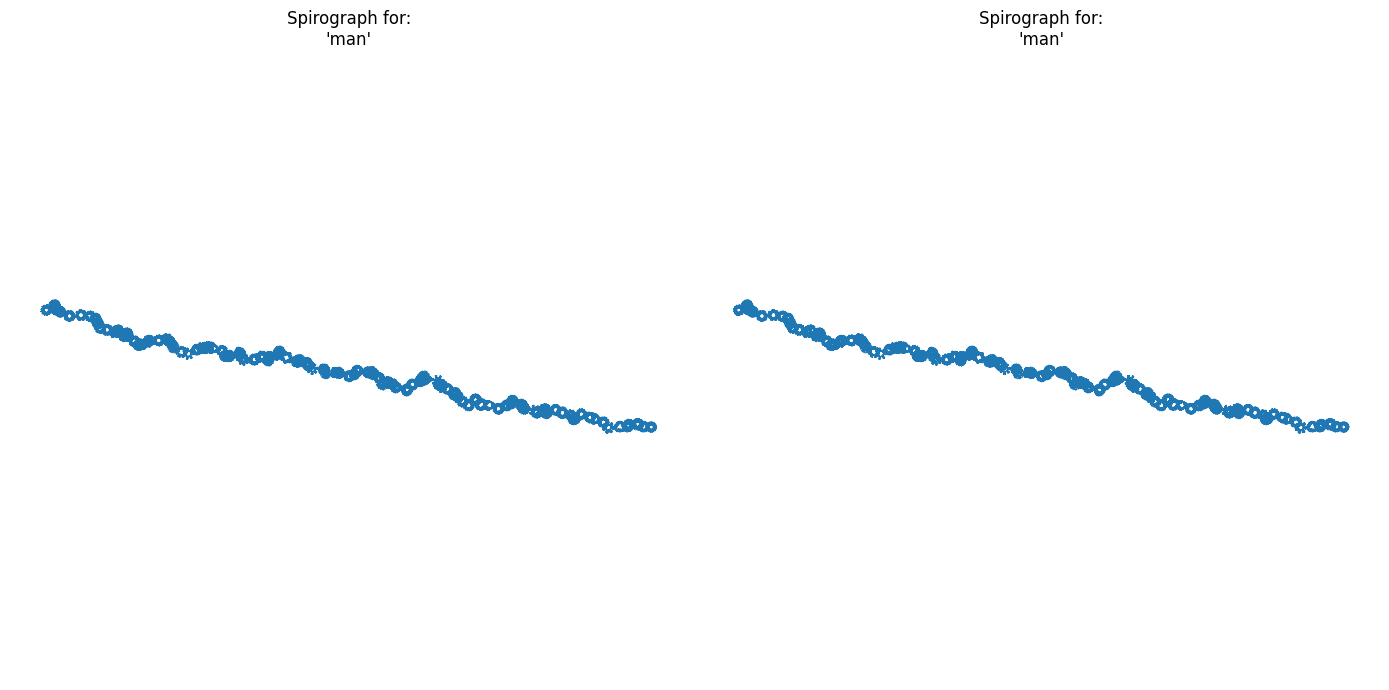

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Spirograph generation function
def spirograph(R, r, d, num_points=100):
    theta = np.linspace(0, 2 * np.pi * r / np.gcd(int(R), int(r)), num_points)
    x = (R - r) * np.cos(theta) + d * np.cos(((R - r) / r) * theta)
    y = (R - r) * np.sin(theta) - d * np.sin(((R - r) / r) * theta)
    return x, y

# Normalize triplet of embedding into spirograph parameters
def normalize_triplet(triplet):
    eR, er, ed = np.tanh(triplet)
    R = 100 + 50 * eR
    r = 15 + 10 * er
    d = 40 + 30 * ed
    return R, r, d

# Composite spirograph generator from embedding
def composite_spirograph(embedding):
    x_total, y_total = [], []
    triplets = embedding[:384].reshape(-1, 3)
    for triplet in triplets:
        R, r, d = normalize_triplet(triplet)
        x, y = spirograph(R, r, d, num_points=150)
        if x_total:
            x += x_total[-1] - x[0]
            y += y_total[-1] - y[0]
        x_total.extend(x)
        y_total.extend(y)
    return np.array(x_total), np.array(y_total)

# Define two sentences
sentence1 = "man"
sentence2 = "man"

# Generate embeddings
embedding1 = model.encode(sentence1)
embedding2 = model.encode(sentence2)

# Generate spirograph paths
x1, y1 = composite_spirograph(embedding1)
x2, y2 = composite_spirograph(embedding2)

# Plot comparison
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, linewidth=0.6)
plt.title(f"Spirograph for:\n'{sentence1}'")
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(x2, y2, linewidth=0.6)
plt.title(f"Spirograph for:\n'{sentence2}'")
plt.axis('equal')
plt.axis('off')

plt.tight_layout()
plt.show()